In [1]:
# Code source: Andreas Krause, based on Jaques Grobler
# License: BSD 3 clause
# Load and prepare data

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, PolynomialFeatures


# Load the diabetes dataset
diabetes = datasets.load_diabetes()

Y_all = diabetes.target
X_all = scale(diabetes.data) # zero mean unit variance
n_all = Y_all.size
n_test = 20

# Split the data into training/testing sets
X_train = X_all[:-n_test]
X_test = X_all[-n_test:]

# Split the targets into training/testing sets
Y_train = Y_all[:-20]
Y_test = Y_all[-20:]


Coefficients: 
 [33.73295272]
Mean squared error: 4058.41
Explained variance: 0.16


/Users/sebascuri/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


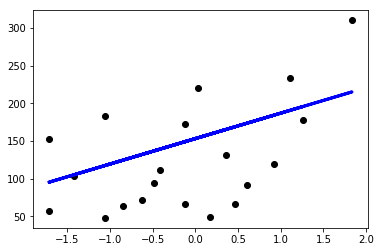

In [2]:
# Now let's train a 1D linear regression based on a single feature

use_feature = 3
# Use only one feature

X_train_1D = X_train[:, np.newaxis, use_feature]
X_test_1D = X_test[:, np.newaxis, use_feature]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(X_train_1D, Y_train)

# Make predictions on the testing set
Y_pred = regr.predict(X_test_1D)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test_1D, Y_test,  color='black')
plt.plot(X_test_1D, Y_pred, color='blue', linewidth=3)

plt.show()

Coefficients: 
 [ 1.44360014e-02 -1.13033495e+01  2.42834645e+01  1.55888584e+01
 -3.87242964e+01  2.34407995e+01  4.89200200e+00  8.78083524e+00
  3.53656217e+01  3.61947824e+00]
Mean squared error: 2004.57
Explained variance: 0.59


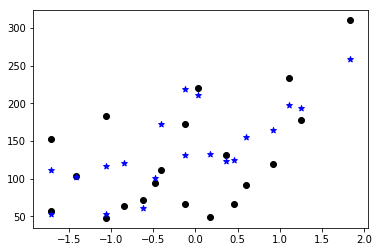

In [3]:
# Now let's use all features

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test_1D, Y_test,  color='black')
plt.scatter(X_test_1D, Y_pred, color='blue', marker='*')

plt.show()

Coefficients: 
 [ 0.         32.39842197 13.12177699 -0.36124814 -2.5108258   0.25200116]
Mean squared error: 3799.76
Explained variance: 0.21


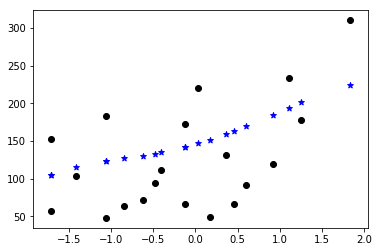

In [4]:
# Now let's use all features

# Create linear regression object
regr = linear_model.LinearRegression()

PF = PolynomialFeatures(degree=5, interaction_only=False, include_bias=True)

X_train_poly = PF.fit_transform(X_train_1D)
X_test_poly = PF.fit_transform(X_test_1D)


# Train the model using the training sets
regr.fit(X_train_poly, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test_poly)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance: %.2f' % r2_score(Y_test, Y_pred))

# Plot outputs
plt.scatter(X_test_1D, Y_test,  color='black')
plt.scatter(X_test_1D, Y_pred, color='blue', marker='*')

plt.show()